# Simulating the paired birth death process
Tim Tyree<br>
10.12.2022

In [46]:
from lib import *

In [77]:
from collections import deque


In [511]:
#reset matplotlib
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [515]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline

In [513]:
from scipy import stats
darkmode=True
if darkmode:
    # For darkmode plots
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
import warnings
warnings.simplefilter("ignore", UserWarning)
# import cupy as cp
np.random.seed(42)
# cp.random.seed(42)

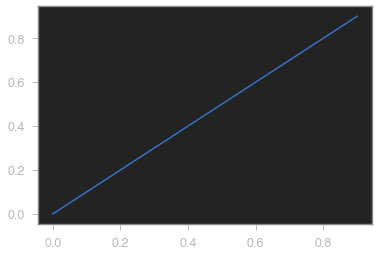

In [516]:
xv=np.arange(0,1,0.1)
plt.plot(xv,xv)
plt.show()

In [690]:
#define token system parameters
num=4/3
nup=2/3
A=1.
Mp=1.
# mag_ratio=0.5 #minus divided by plus
# Mm=float(Mp * mag_ratio)
Mm=0.5
comp_Wp = get_comp_W(A,nup,Mp)
comp_Wm = get_comp_W(A,num,Mm)
Wp = njit(comp_Wp)
Wm = njit(comp_Wm)


In [691]:
#define time step, DT
# DT = 0.025
DT = 0.1#0.025
print(f"let {DT=} seconds.")
print(f"{np.sqrt((DT*512)**2*100)=}")
print(f"{np.log(128)/np.log(2)=}")
print(f"{np.sqrt(128/2)=}")
print(f"ooh... yes...")

let DT=0.1 seconds.
np.sqrt((DT*512)**2*100)=512.0
np.log(128)/np.log(2)=7.0
np.sqrt(128/2)=8.0
ooh... yes...


In [692]:
#compute the probability of upward/downward transition by powerlaw
#input: N, Wp, Wm
#output: real value between 0 and 1
#TODO: implement linked list bc it handles infinite spaces well.
#HINT: stackoverflow numpy linked list datatype

In [693]:
#set initial number of particles
@njit
def comp_first_passage_time_paired_bd_process(
        N=6,
        DT=0.1,
        random_state=42,
        max_num_steps=1000000,**kwargs):
    """
    Example Usage:
first_passage_time = comp_first_passage_time_paired_bd_process(N=6,
            random_state=42,max_num_steps=1000000)#,**kwargs)
    """
    np.random.seed(random_state)
    error_code=0
    assert N%2==0
    step=0
    dont_break=True
    while dont_break:
        #compute transition probabilities
        pup = Wp(N)*DT
        pum = Wm(N)*DT
        #randomly sample a value
        p = np.random.rand()
        #change depending on that value
        if p>pup:
            N+=2
        if p<pum:
            N-=2
        #i know edge case exists for ~1/2 of the sample in theory.
        #decide edge cases by predominance
        #by setting switch to go up instead of down when transition is otherwise undefined.
        #else, we'll keep to the default, wherein negative wins...
        if pum>pup:
            #closest one to half wins
            dpum=np.abs(0.5-pum)
            dpup=np.abs(0.5-pup)
            if dpup<dpum:
                #then for once, positive wins!
                if (p>pup) & (p<pum):
                    N+=2
        #break if not a particle exists
        if N<1:
            dont_break=False
        elif step>max_num_steps:
            dont_break=False
            error_code=1
        step+=1

    first_passage_time = step*DT
    return first_passage_time

__result:__ ^that is crazy-ass inefficient.  it didn't even finish after 10000002 time steps


In [694]:

random_state=42
max_num_steps=100000

np.random.seed(random_state)


# first_passage_time = comp_first_passage_time_paired_bd_process(N=6,DT=DT,
#                                             max_num_steps=1000000)
comp_first_passage_time_paired_bd_process(
        N=6,
        DT=0.1,
        random_state=43,
        max_num_steps=1000000)

# first_passage_time
#TODO: vectorize ^this
# first_passage_time = comp_first_passage_time_paired_bd_process(N=6,
#             random_state=42,max_num_steps=1000000)#,**kwargs)
# first_passage_time


240.9

In [695]:
#warning >5 min run time
# #simulate first passage times many times
# max_num_steps=1000000
# num_epochs=100
# DT=0.01
# seed=random_state
# N_values  = np.arange(2,80,2)
# zeroes_values = np.zeros_like(N_values)
# first_passage_time_values_lst = []
# for epoch in range(num_epochs):
#     first_passage_time_values = zeroes_values.copy()    
#     for i,N in enumerate(N_values):
#         first_passage_time_values[i]=comp_first_passage_time_paired_bd_process(
#                 N=N,DT=DT,random_state=seed*(epoch+1),max_num_steps=max_num_steps)
#     #record
#     first_passage_time_values_lst.append(first_passage_time_values.copy())
# #     first_passage_time_values_lst.append(first_passage_time_values)

In [696]:
# first_passage_time_values_lst[1]

In [697]:
# arr = np.stack(first_passage_time_values_lst)
# y_values = np.mean(arr,axis=0)
# plt.plot(N_values,y_values)

In [698]:
# #DONE: estimate the distribution of termination times
# arr[-1].shape

In [699]:
# arr[:,-1]

In [700]:
# fontsize=14
# bins=np.arange(4,20,0.2)
# fig,ax=plt.subplots()
# for i in range(10):
#     ax.hist(arr[:,i],bins=bins,label=i)
# format_plot(ax=ax,xlabel='x',ylabel='y',fontsize=fontsize)
# ax.legend(fontsize=fontsize,loc='upper right')
# plt.show()

In [701]:
# TODO: average ^this over the expected number of particles from the qs distrib

# scratchwerk

In [702]:
# #set initial number of particles
# N=6
# max_num_particles_init_over_2=512
# # Nmax=2*max_num_particles_init_over_2
# n_values = np.arange(max_num_particles_init_over_2)
# p_values = np.zeros(max_num_particles_init_over_2)
# # pin_values = np.zeros(max_num_particles_init_over_2)
# # pout_values = np.zeros(max_num_particles_init_over_2)
# p_values[n_values==N]=1.
# p_values_out=p_values.copy()

In [703]:
#TODO: dev deterministic one step method from the recurrance relation from the master equation
#input: Wp, Wm
#output: t_matrix = transition matrix for this linear system of ode's
#input: t_matrix,p_values
#output: number of steps until termination

# input_p_values=


In [704]:
# def comp_probability_current(N,N_values,P_values,Wp,Wm):
#     """returns the probability current in the paired birth-death process.
    
#     N_values is int array indexed by int N.  
#     P_values is a float array. 
#     Wp,Wm are real functions that return floats.
    
#     Example Usage:
# P_values=np.ones(N_values.shape[0])
# flux_in_hi , flux_in_lo , flux_out = comp_probability_current(N,N_values,P_values,Wp,Wm)
#     """
#     P = float(P_values[N==N_values])
#     Pp= float(P_values[N+2==N_values])
#     Pm= float(P_values[N-2==N_values])
#     flux_in_lo = Wp(N-2)*Pm 
#     flux_in_hi = Wm(N+2)*Pp 
#     flux_out= Wp(N)*P    + Wm(N)*P 
#     current = flux_in_hi + flux_in_lo - flux_out
#     return flux_in_hi , flux_in_lo , flux_out
#     #return current

# simulating the master equations

In [705]:
max_num_particles_init_over_2=512
max_num_particles_init_over_2=50
max_num_particles_init_over_2=200


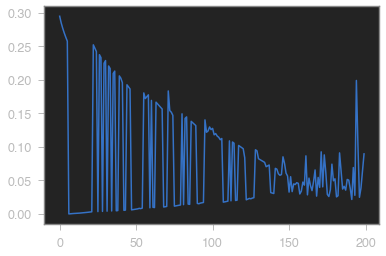

In [706]:
plt.plot(np.linalg.eigvals(-t_matrix))
# format_plot(use_loglog=True)
plt.show()

In [714]:
# input_fn = search_for_file()
# input_fn
wjr=recall_powerlaw_fits_to_full_models()

kwargs = dict(data_fk_dir=f'{nb_dir}/data/full_results/data_fig4_vidmar_fk_tt.csv',
              data_lr_dir=f'{nb_dir}/data/full_results/data_fig4_vidmar_lr_tt.csv',
             min_num_particles=9)
dict_wjr = recall_death_rates_vidmar_rappel(**kwargs)
fk=dict_wjr['fk'].sort_values(by='q')
lr=dict_wjr['lr'].sort_values(by='q')

# birth_rate_dir_fk = '/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results/data_fig4_timothy_fk_up2_rescaled_per_tt.csv'
# birth_rate_dir_lr = '/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results/data_fig4_timothy_lr_up2_rescaled_per_tt.csv'
birth_rate_dir_fk = '/Users/timothytyree/Documents/GitHub/bgmc/python/data/full_results/data_fig4_timothy_fk_up2_rescaled_per_tt.csv'
birth_rate_dir_lr = '/Users/timothytyree/Documents/GitHub/bgmc/python/data/full_results/data_fig4_timothy_lr_up2_rescaled_per_tt.csv'
# death_rate_dir_fk = '/Users/timothytyree/Documents/GitHub/bgmc/python/data/full_results/data_fig4_vidmar_fk_rescaled_rates.csv'
# death_rate_dir_lr = '/Users/timothytyree/Documents/GitHub/bgmc/python/data/full_results/data_fig4_vidmar_lr_rescaled_rates.csv'
# df_death = pd.read_csv(death_rate_dir_fk)
df_birth_fk = pd.read_csv(birth_rate_dir_fk)
# df_death = pd.read_csv(death_rate_dir_lr)
df_birth_lr = pd.read_csv(birth_rate_dir_lr)

#scale from kHz to Hz
df_birth_fk['w']*=1e3
df_birth_lr['w']*=1e3

# DONE: compute powerlaw fits of birth rates wjr
dict_fit_birth_fk = print_fit_power_law(x=df_birth_fk['q'].values,y=df_birth_fk['w'].values)
dict_fit_birth_lr = print_fit_power_law(x=df_birth_lr['q'].values,y=df_birth_lr['w'].values)

print(f"\nwjr['fk_pbc']:")
print_dict(wjr['fk_pbc'])
print(f"\nwjr['lr_pbc']:")
print_dict(wjr['lr_pbc'])

print(f"\nwjr['fk_pbc']:")
print_dict(wjr['fk_pbc'])
print(f"\nwjr['lr_pbc']:")
print_dict(wjr['lr_pbc'])


#DONE: get token inputs prepared
dict_fit_death_lr = dict(wjr['lr_pbc'])
dict_fit_death_fk = dict(wjr['fk_pbc'])
Mp = dict_fit_birth_fk['M']
nup = dict_fit_birth_fk['m']
Mm = dict_fit_death_fk['M']
num = dict_fit_death_fk['m']
model_name='Fenton-Karma'

# Mp = dict_fit_birth_lr['M']
# nup = dict_fit_birth_lr['m']
# Mm = dict_fit_death_lr['M']
# num = dict_fit_death_lr['m']
# model_name='Luo-Rudy'

m = 0.229594 +/- 0.010098
M = 0.864210 +/- 0.002349 Hz/cm^2; B=0.529597 +/- 0.020570
RMSE=0.0215 Hz/cm^2; R^2=0.9655; N=73
m = 0.714755 +/- 0.009768
M = 3.277073 +/- 0.102643 Hz/cm^2; B=5.262676 +/- 0.107278
RMSE=0.0417 Hz/cm^2; R^2=0.9971; N=62

wjr['fk_pbc']:
m=1.8772341309722325
Delta_m=0.02498750277237229
M=5.572315674840435
Delta_M=0.3053120355191732
b=1.665608066257863
Delta_b=0.029341409948945123

wjr['lr_pbc']:
m=1.6375562704001745
Delta_m=0.017190912126700632
M=16.73559858353835
Delta_M=0.8465090320196467
b=2.86877101880514
Delta_b=0.0311865277365552

wjr['fk_pbc']:
m=1.8772341309722325
Delta_m=0.02498750277237229
M=5.572315674840435
Delta_M=0.3053120355191732
b=1.665608066257863
Delta_b=0.029341409948945123

wjr['lr_pbc']:
m=1.6375562704001745
Delta_m=0.017190912126700632
M=16.73559858353835
Delta_M=0.8465090320196467
b=2.86877101880514
Delta_b=0.0311865277365552


In [715]:
#TODO: compute the eigenvalues of the transition matrix
#TODO: compute the fraction terminated time trace initializing at the quasistatic distribution
#estimate the quasistatic distribution
L=5 #cm
A=L**2
num_iter=20

#TODO: recall the powerlaw fits to the FK model 
#heretim

# Wp = get_comp_W(A,nup,Mp)
# Wm = get_comp_W(A,num,Mm)
comp_Wp = get_comp_W(A,nup,Mp)
comp_Wm = get_comp_W(A,num,Mm)
Wp = njit(comp_Wp)
Wm = njit(comp_Wm)

# n_qs,prob_qs = comp_quasistatic_distrib_paired_bdrates(comp_Wm,comp_Wp,num_iter=num_iter,freq_prev=1.)
n_qs,prob_qs = comp_quasistatic_distrib_paired_bdrates(Wm,Wp,num_iter=num_iter,freq_prev=100.)

In [725]:
# num_iter=int(Nmax/2)
N_qs,P_qs = comp_quasistatic_distrib_paired_bdrates(Wm,Wp,num_iter=dim,freq_prev=1.)
# P_qs/=np.sum(P_qs) #normalize for 1.0000000000000002 floating point arith error
# assert np.sum(P_qs)==1
P_qs.shape,np.sum(P_qs)

((200,), 1.0000000000000002)

In [728]:
# DT=0.01
# DT=0.0025
# DT=0.0000025 #stable at N=Nmax measurement as initial condition
DT=0.000025 #stable?
dim=max_num_particles_init_over_2
#precompute the transition matrix
N_values = 2*(1+np.arange(dim))
t_matrix=np.zeros((dim,dim))
for i,N in enumerate(N_values):
    flux_in_lo = Wp(N-2)
    flux_in_hi = Wm(N+2)
    flux_out= Wp(N) + Wm(N)
    t_matrix[i,i]-=flux_out
    t_matrix[i,i-1]+=flux_in_lo
    if i+1<dim:
        t_matrix[i,i+1]+=flux_in_hi
#     else:
#         #TODO: implement reflecting boundary conditions at the high particle number cutoff
#         #heretim
# #         t_matrix[i+1,i+1]+=flux_in_hi # is it that simple?
#         t_matrix[i,i]+=flux_in_hi # is it that simple?
        
t_matrix[0,0] = -(Wm(2)+Wp(2)) # from N=2
t_matrix[0,1] = Wm(4) # from N=4

#reflecting bc at end
Nmax=int(N_values[-1])
# t_matrix[-1,-1] = -(Wm(Nmax)) #-(Wm(Nmax)+Wp(Nmax)) 
t_matrix[-1,-1] = -Wm(Nmax) #-(Wm(Nmax)+Wp(Nmax)) 
t_matrix[-1,-2] = Wp(Nmax-2) 

t_matrix*=DT #transfer func is now in dimensionless units 

#DONT: #transpose
# t_matrix = t_matrix.T.copy()

In [736]:
# num_steps=10000
num_steps=int(1e8)
# num_steps=int(1e6)  #gives a perfect exponential curve in <60 seconds
#TODO: use  ^this 1e6 time steps to deduce the 
# functional dependence / gradients of nup,num,Mp,Mm evaluated at the full models

#implement the absorbing boundary condition at N=0
#TODO: do a basic numerical test case using an initial state measured to be at N=2.
# P_values = np.zeros(dim)
# P_values[0]=1. #measured to be at N=2.
# P_values[-1]=1. #measured to be at N=Nmax.
save_every=10000
P_values=P_qs.copy()
print(f"{sum(P_values)=}")
# P_net_values = np.zeros(num_steps)-9999.
P_net_lst=[]
step_lst=[]
for step in range(num_steps):
    # dP_values=np.dot(t_matrix,P_values)
    P_values+=np.dot(t_matrix,P_values)#dP_values
    if step%save_every==0:
        P_net = np.sum(P_values)
        #record
        P_net_lst.append(P_net)
        step_lst.append(step)
    #P_net_values[step]=P_net
print(f"{sum(P_values)=}")
P_net_values=np.array(P_net_lst)
t_values=np.array(step_lst)*DT #seconds
# t_values=np.arange(num_steps)*DT #seconds

sum(P_values)=1.0000000000000004
sum(P_values)=1.870107588644406e-74


In [737]:
beep(3)

-n 
-n 
-n 


0

In [731]:
#TODO: implement the IMR using the iterative method

__Result__ all eigen values are strictly negative, supporting the existence of a rate limiting step that sets and the effective time scale for an exponential distribution of termination times.

- TODO: plug ^that into letter and let them challenge me, bruh.

In [732]:
# P_net_values

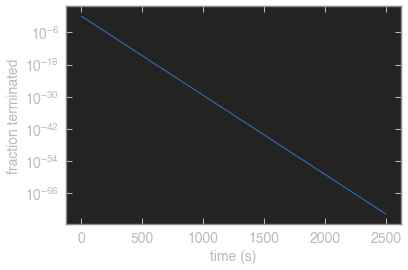

In [738]:
fig,ax=plt.subplots(figsize=(6,4))
ax.plot(t_values,P_net_values,lw=1)
# ax.plot(t_values,P_net_values,lw=1)
# ax.set_xlim([DT/2,1.1])
# ax.set_ylim([0.001,1])
# ax.set_xscale('log')
ax.set_yscale('log')
format_plot(ax=ax,xlabel='time (s)',ylabel='fraction terminated',fontsize=14)
ax.tick_params(top=True, right=True,direction='in',which='both')
plt.show()

In [575]:
A

25

<AxesSubplot:>

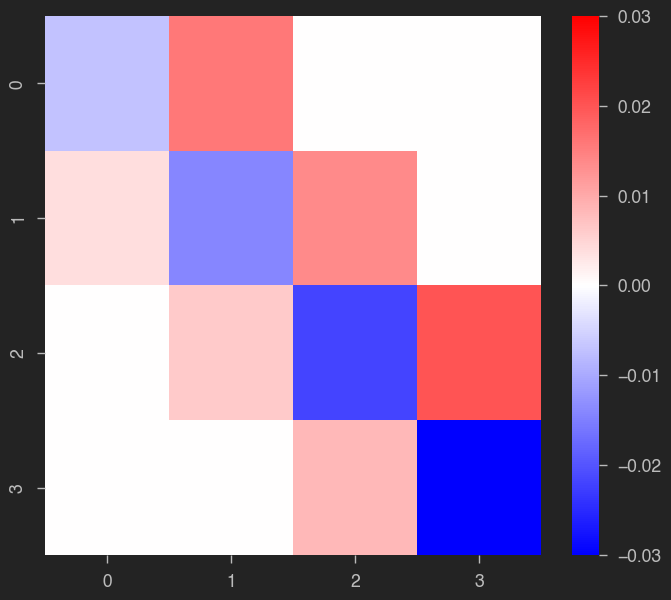

In [452]:
#heretim
#TODO: do a basic numerical test case using quasistatic distribution
#
sns.heatmap(t_matrix[:4,:4],vmin=-.03,vmax=.03,cmap='bwr')

<AxesSubplot:>

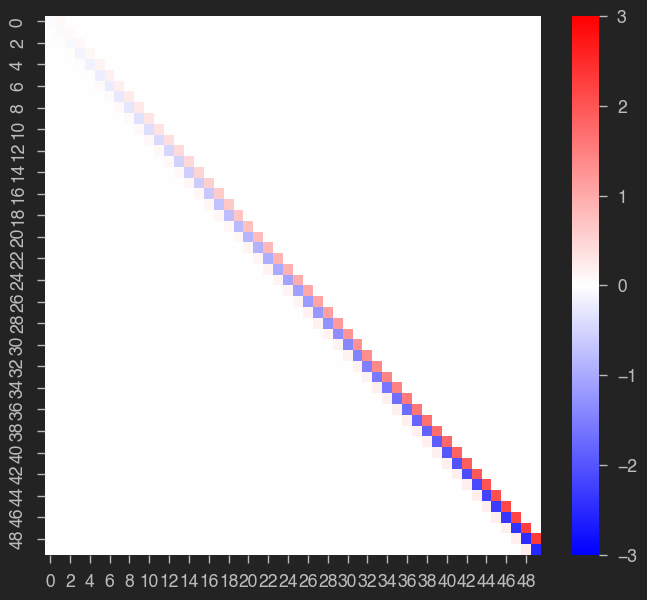

In [422]:
sns.heatmap(t_matrix,vmin=-3,vmax=3,cmap='bwr')

In [384]:
dim=max_num_particles_init_over_2
t_matrix=np.zeros((dim,dim))
l_matrix=np.zeros((dim,dim))
i_matrix=np.eye(dim)
for i in range(dim):
    im=i-1
    #im=i+1
    for j in range(dim):
        if im==j:
            l_matrix[i,j]=1
# i_matrix      
l_matrix.T

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
dp_values =  #dpdt
dp_values*=DT

In [367]:
Wp,Wm

(CPUDispatcher(<function get_comp_W.<locals>.comp_W at 0x7fdcf974eaf0>),
 CPUDispatcher(<function get_comp_W.<locals>.comp_W at 0x7fdcf974e940>))

In [153]:
#TODO: dev one step method from the recurrance relation from the master equation
#HINT: i can copy stuff from the quasistatic solution 
# if i don't want to transcribe my easily accessible notes from this afternoon.
#TODO: compute transition from lo to hi
#TODO: compute transition from hi to lo
#TODO: format this as a matrix
#TODO: multiply by the transition matrix until  

In [55]:
#TODO: compute thresholds lo and hi given N

In [369]:
# pthresh_lo=?

In [368]:
# pthresh_hi=?

In [370]:
# #TODO: derive the rate of growth/decay at each n value
# N=6
# random_state=42
# assert N%2==0
# np.random.seed(random_state)
# p = np.random.rand()
# if p<pthresh_lo:
#     print(f"oh oh! lo fo sho!")
# if p<pthresh_hi:
#     print(f"he hi! wanna come by!?")

In [365]:

# # p_deque = deque(np.array(list(range(max_num_particles_init_over_2))))
# # p_deque = deque(np.array(list(range(max_num_particles_init_over_2))))
# n_deque = deque(np.arange(1,N+1))
# p_deque = deque([0.*x for x in n_deque])
# n_deque.
# d = deque([1,2,3,4])

# # # print d
# # for x in d:
# #     print x
# # # print d.pop(), d